In [ ]:
!pip install -q autokeras

In [ ]:
import os
import random
import time
import numpy as np
import pandas as pd
from PIL import Image
import autokeras as ak
import tensorflow as tf
from numpy import asarray
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tensorflow.keras.callbacks import CSVLogger
from sklearn.datasets import load_files
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import Binarizer
from skimage import io


In [ ]:
!unzip "/TSPImages/TSPimages.zip" -d "CHRvsGREEDY"


In [ ]:
#image = tf.keras.preprocessing.image.load_img("/content/CHRvsGREEDY/CHRimages/TSP-100-1-0-3811.png")
#input_arr = tf.keras.preprocessing.image.img_to_array(image)
#X = np.array([])
X = []
names = []
imgdir1 = "/content/CHRvsGREEDY/CHRimages/"
for filename in os.listdir(imgdir1):
  imagepath = os.path.join(imgdir1, filename)
  image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
  npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
  X.append(npimage)
  names.append(imagepath[:-4])
#y1 = np.zeros(len(os.listdir(imgdir1))) #labels 0 for chr
y1 = [0] *len(os.listdir(imgdir1))
imgdir2 = "/content/CHRvsGREEDY/GRDimages/"
for filename in os.listdir(imgdir2):
  imagepath = os.path.join(imgdir2, filename)
  image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
  npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
  names.append(imagepath[:-4])
  X.append(npimage)
#y2 = np.ones(len(os.listdir(imgdir2))) # labels 1 for GREEDY
y2 = [1] *len(os.listdir(imgdir1))
#X = np.array(X)
#y = np.concatenate((y1,y2),axis=None)
y = y1+y2
names = [e[21:] for e in names]


mixer = list(zip(names, X, y))
random.shuffle(mixer)

names, X, y = zip(*mixer)
X = np.array(X)
y = np.array(y)
npnames = np.array(names)

In [ ]:
!unzip ALLImgs.zip

In [ ]:
!unzip DSATURimgs3.zip -d DS3
!unzip LFimgs3.zip -d Lf3

In [ ]:
# ALL Images setup
domain = "ALL"
X = []
y = []
names = []
imgDirs = ["CHRimages", "ComboImgs","DSATURimgs", "ExpImgs","GRDimages","LFimgs"]

for i, dir in enumerate(imgDirs):
  print(dir)
  print(i)
  for filename in os.listdir(dir):
    imagepath = os.path.join(dir, filename)
    image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
    npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
    #print(npimage)
    X.append(npimage)
    y.append(i)
    names.append(imagepath[:-4])


CHRimages
0
ComboImgs
1
DSATURimgs
2
ExpImgs
3
GRDimages
4
LFimgs
5


In [ ]:
# Knapsack Problem Images setup
domain = "KP"
X = []
y = []
names = []
imgDirs = ["ComboImgs", "ExpImgs"]

for i, dir in enumerate(imgDirs):
  print(dir)
  print(i)
  for filename in os.listdir(dir):
    imagepath = os.path.join(dir, filename)
    image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
    npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
    X.append(npimage)
    y.append(i)
    names.append(imagepath[:-4])

ComboImgs
0
ExpImgs
1


In [ ]:
# Graph Colouring Images setup
domain = "GC"
X = []
y = []
names = []
imgDirs = ["DSATURimgs", "LFimgs"]

for i, dir in enumerate(imgDirs):
  print(dir)
  print(i)
  for filename in os.listdir(dir):
    imagepath = os.path.join(dir, filename)
    image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
    npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
    X.append(npimage)
    y.append(i)
    names.append(imagepath[:-4])

DSATURimgs
0
LFimgs
1


In [ ]:
# TSP Images setup
domain = "TSP"
X = []
y = []
names = []
imgDirs = ["CHRimages", "GRDimages"]

for i, dir in enumerate(imgDirs):
  print(dir)
  print(i)
  for filename in os.listdir(dir):
    imagepath = os.path.join(dir, filename)
    image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
    npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
    X.append(npimage)
    y.append(i)
    names.append(imagepath[:-4])

CHRimages
0
GRDimages
1


In [ ]:
!mkdir TSP
!mv CHRimages/* TSP/
!mv GRDimages/* TSP/

!mkdir KP
!mv ComboImgs/* KP/
!mv ExpImgs/* KP/

!mkdir GC
!mv DSATURimgs/* GC/
!mv LFimgs/* GC/

In [ ]:
# Domains Images setup
domain = "DOMAINrec"
X = []
y = []
names = []
imgDirs = ["TSP", "KP","GC"]

for i, dir in enumerate(imgDirs):
  print(dir)
  print(i)
  for filename in os.listdir(dir):
    imagepath = os.path.join(dir, filename)
    image = tf.keras.preprocessing.image.load_img(imagepath,color_mode='grayscale')
    npimage = tf.keras.preprocessing.image.img_to_array(image)*(1./255.)
    X.append(npimage)
    y.append(i)
    names.append(imagepath[:-4])

TSP
0
KP
1
GC
2


In [ ]:
for i in npimage:
  print(i)

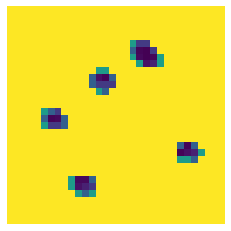

In [ ]:
plt.axis('off')
plt.imshow(image)

In [ ]:
mixer = list(zip(names, X, y))
random.shuffle(mixer)

names, X, y = zip(*mixer)
X = np.array(X)
y = np.array(y)
npnames = np.array(names)

In [ ]:
%load_ext tensorboard

In [ ]:
tf_callbacks = [
    tf.keras.callbacks.CSVLogger("Images-Training.csv", separator=",", append=False),
    tf.keras.callbacks.TensorBoard(log_dir='./logs',profile_batch = 100000000),
]

In [ ]:
trained_models_path = f'TrainedModels{domain}Images'
!mkdir $trained_models_path

In [ ]:
cv = KFold(n_splits=10, random_state=1 ,shuffle=True)
all_tests = []
all_predictions = []
reports = []
results_df = pd.DataFrame()
folds=0
for train_index, test_index in cv.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  #clf = ak.AutoModel(inputs=input_node, outputs=output_node, overwrite=False, max_trials=1)
  clf = ak.ImageClassifier(overwrite=False, max_trials=1)
  #clf = ak.TextClassifier(overwrite=True, max_trials=1)
  # Supervised training of the model
  print("Start training")

  clf.fit(X_train, y_train, epochs=100, callbacks=tf_callbacks)
  print("Prendictions on unseen data")
  predicted_y = clf.predict(X_test)
  results_df['fold'+str(folds)] = npnames[test_index]
  results_df['fold'+str(folds)+ '-Y'] = y_test
  results_df['fold'+str(folds)+ '-Prediction'] = predicted_y

  all_tests.append(y_test)
  all_predictions.append(np.array(predicted_y, dtype=int).flatten())
  report = classification_report(y_test, np.array(predicted_y, dtype=int).flatten())
  reports.append(report)
  print(report)
  time.sleep(13)
  clf.export_model().save('TrainedModelsTSPImages/TrainedModel-Fold'+str(folds))
  folds+=1;

In [ ]:
!zip -r trained_models $trained_models_path
!zip -r ak-logs.zip logs

In [ ]:
results_path = f'{domain}ImagesResults.csv'
results_df.to_csv(results_path)

import shutil

gdrive_link = f'/{domain}Images/'
os.makedirs(os.path.dirname(gdrive_link), exist_ok=True)
shutil.copy(results_path, gdrive_link)
shutil.copy("trained_models.zip", gdrive_link)
shutil.copy("ak-logs.zip", gdrive_link)


In [ ]:
predictions = []
for sublist in all_predictions:
    for item in sublist:
        predictions.append(int(item[0]))

tests = []
for sublist in all_tests:
    for item in sublist:
        tests.append(item)

In [ ]:

print(report)

              precision    recall  f1-score   support

           0       0.72      0.35      0.47       818
           1       0.58      0.87      0.70       848

    accuracy                           0.62      1666
   macro avg       0.65      0.61      0.59      1666
weighted avg       0.65      0.62      0.59      1666



In [ ]:
exported_model = clf.export_model()

In [ ]:
exported_model.summary()

In [ ]:
exported_model.save("our_model2")

In [ ]:
loaded_model = tf.keras.models.load_model("our_model2", custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
loadedpredictions = clf.predict(X_test)

79/79 [==============================] - 0s 5ms/step


In [ ]:
loaded_model.fit(X_train, y_train, epochs=3, callbacks=tf_callbacks)

In [ ]:
df = pd.DataFrame(report).transpose()
df.to_latex('TSPimages.tex')


In [ ]:
%tensorboard --logdir logs

In [ ]:
!zip -r logs.zip logs

In [ ]:
!pip install tensorboard-reducer


In [ ]:
!tb-reducer logs* reduced_logs -r mean,std,min,max
